In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [28]:
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")

In [15]:
# Dataset Overview
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)

print(f"\nShape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumns:\n{df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")

print("\nFirst 5 Rows:")
df.head()

DATASET OVERVIEW

📊 Shape: 3000 rows, 10 columns

📋 Columns:
['Country', 'Year', 'Attack Type', 'Target Industry', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used', 'Incident Resolution Time (in Hours)']

🔍 Data Types:
Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

❓ Missing Values:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


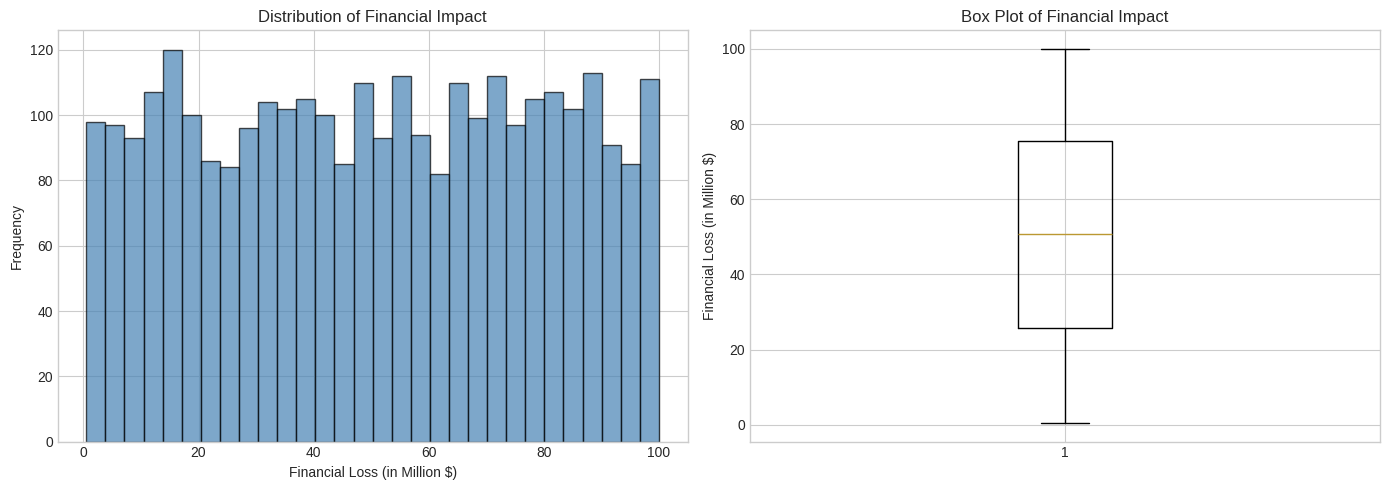

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Financial Loss (in Million $)'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Financial Loss (in Million $)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Financial Impact')

# Box plot
axes[1].boxplot(df['Financial Loss (in Million $)'], vert=True)
axes[1].set_ylabel('Financial Loss (in Million $)')
axes[1].set_title('Box Plot of Financial Impact')

plt.tight_layout()
plt.show()

## Data Visualizations and Interpretation

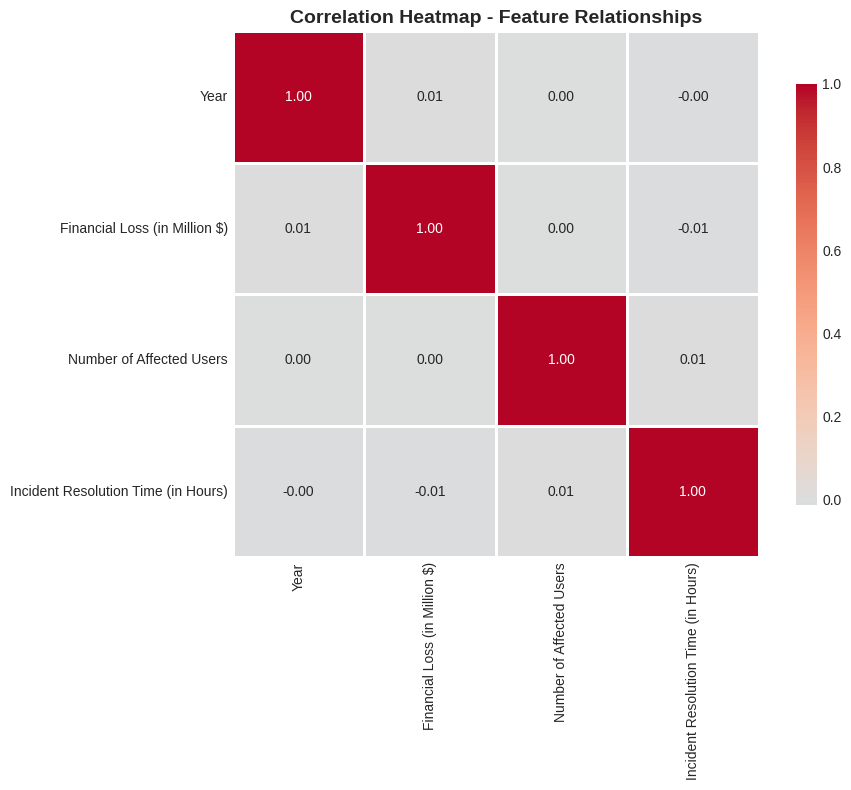


📈 Key Correlations with Financial Loss:
Financial Loss (in Million $)          1.000000
Year                                   0.010581
Number of Affected Users               0.001787
Incident Resolution Time (in Hours)   -0.012671
Name: Financial Loss (in Million $), dtype: float64


In [ ]:
# Correlation Heatmap - Identify feature relationships
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Feature Relationships', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations with Financial Loss:")
print(correlation_matrix['Financial Loss (in Million $)'].sort_values(ascending=False))

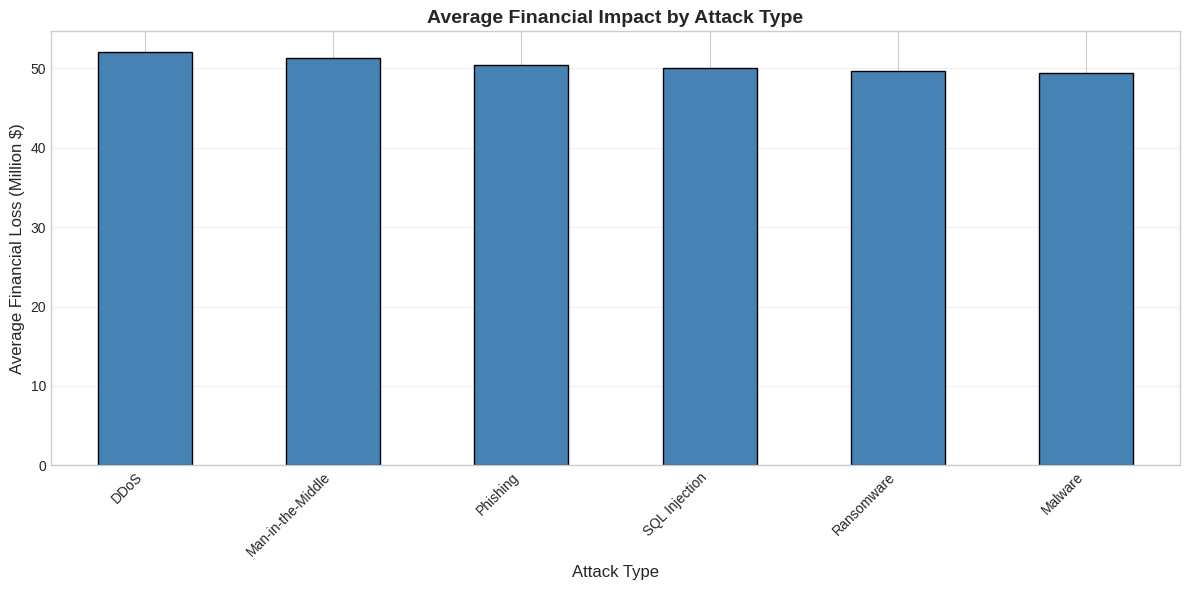


💰 Average Financial Loss by Attack Type:
Attack Type
DDoS                 52.035631
Man-in-the-Middle    51.309085
Phishing             50.459905
SQL Injection        50.013042
Ransomware           49.653793
Malware              49.418454
Name: Financial Loss (in Million $), dtype: float64


In [ ]:
# Financial Impact by Attack Type
plt.figure(figsize=(12, 6))
attack_impact = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=False)
attack_impact.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Average Financial Impact by Attack Type', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Average Financial Loss (Million $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAverage Financial Loss by Attack Type:")
print(attack_impact)

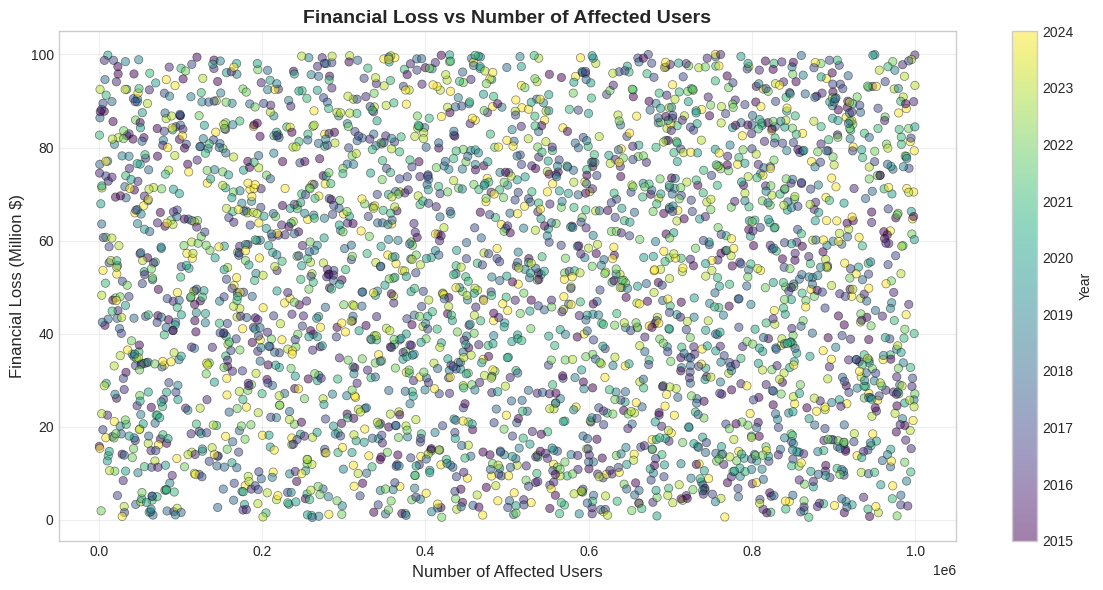


🔗 Correlation between Affected Users and Financial Loss: 0.0018


In [ ]:
# Scatter Plot - Affected Users vs Financial Impact
plt.figure(figsize=(12, 6))
plt.scatter(df['Number of Affected Users'], df['Financial Loss (in Million $)'], 
            alpha=0.5, c=df['Year'], cmap='viridis', edgecolors='black', linewidth=0.5)
plt.colorbar(label='Year')
plt.title('Financial Loss vs Number of Affected Users', fontsize=14, fontweight='bold')
plt.xlabel('Number of Affected Users', fontsize=12)
plt.ylabel('Financial Loss (Million $)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

correlation = df['Number of Affected Users'].corr(df['Financial Loss (in Million $)'])
print(f"\nCorrelation between Affected Users and Financial Loss: {correlation:.4f}")

## Feature Engineering and Data Preparation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Encoding categorical variables
df_encoded = df.copy()

categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns to encode: {categorical_cols}\n")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
    print(f"Encoded '{col}': {len(le.classes_)} unique values")

print(f"\nEncoded Dataset Shape: {df_encoded.shape}")
df_encoded.head()


📋 Categorical columns to encode: ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']
✓ Encoded 'Country': 10 unique values
✓ Encoded 'Attack Type': 6 unique values
✓ Encoded 'Target Industry': 7 unique values
✓ Encoded 'Attack Source': 4 unique values
✓ Encoded 'Security Vulnerability Type': 4 unique values
✓ Encoded 'Defense Mechanism Used': 5 unique values

✅ All categorical variables encoded successfully!

🔍 Encoded Dataset Shape: (3000, 10)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,2,2019,3,1,80.53,773169,0,1,4,63
1,2,2019,4,5,62.19,295961,0,1,3,71
2,5,2017,2,4,38.65,605895,0,2,4,20
3,8,2024,4,6,41.44,659320,2,0,0,7
4,4,2018,2,4,74.41,810682,1,0,4,68


In [ ]:
# Train-Test Split and Standardization
X = df_encoded.drop('Financial Loss (in Million $)', axis=1)
y = df_encoded['Financial Loss (in Million $)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {X.shape[1]} columns")

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures standardized (mean=0, std=1)")
print(f"Training features: {X_train_scaled.shape}")
print(f"Testing features: {X_test_scaled.shape}")

TRAIN-TEST SPLIT

📊 Training set: 2400 samples
📊 Testing set: 600 samples

✓ Features (X): 9 columns
✓ Target (y): Financial Loss (in Million $)

FEATURE STANDARDIZATION

✅ Features standardized (mean=0, std=1)
✓ Training features scaled: (2400, 9)
✓ Testing features scaled: (600, 9)


## Model Building and Evaluation

In [ ]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10)
}

results = {}
train_losses = {}
test_losses = {}

print("MODEL TRAINING & EVALUATION")
print("=" * 60)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    model.fit(X_train_scaled, y_train)
    
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[model_name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test
    }
    
    train_losses[model_name] = train_rmse
    test_losses[model_name] = test_rmse
    
    print(f"Training - R²: {train_r2:.4f}, RMSE: ${train_rmse:.2f}M, MAE: ${train_mae:.2f}M")
    print(f"Testing - R²: {test_r2:.4f}, RMSE: ${test_rmse:.2f}M, MAE: ${test_mae:.2f}M")

print("\n" + "=" * 60)

MODEL TRAINING & EVALUATION

🤖 Training Linear Regression...

📊 Training Performance:
   R² Score: 0.0014
   RMSE: $28.85M
   MAE: $25.04M

📊 Testing Performance:
   R² Score: -0.0045
   RMSE: $28.50M
   MAE: $24.66M

✅ Linear Regression trained successfully!

🤖 Training Random Forest...

📊 Training Performance:
   R² Score: 0.4015
   RMSE: $22.34M
   MAE: $19.23M

📊 Testing Performance:
   R² Score: -0.0185
   RMSE: $28.70M
   MAE: $24.72M

✅ Random Forest trained successfully!

🤖 Training Decision Tree...

📊 Training Performance:
   R² Score: 0.1324
   RMSE: $26.89M
   MAE: $22.26M

📊 Testing Performance:
   R² Score: -0.1180
   RMSE: $30.07M
   MAE: $25.46M

✅ Decision Tree trained successfully!

ALL MODELS TRAINED SUCCESSFULLY!

📊 Training Performance:
   R² Score: 0.4015
   RMSE: $22.34M
   MAE: $19.23M

📊 Testing Performance:
   R² Score: -0.0185
   RMSE: $28.70M
   MAE: $24.72M

✅ Random Forest trained successfully!

🤖 Training Decision Tree...

📊 Training Performance:
   R² Sco

In [ ]:
# Model Comparison
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results.keys()],
    'Test R²': [results[m]['test_r2'] for m in results.keys()],
    'Train RMSE': [results[m]['train_rmse'] for m in results.keys()],
    'Test RMSE': [results[m]['test_rmse'] for m in results.keys()],
    'Train MAE': [results[m]['train_mae'] for m in results.keys()],
    'Test MAE': [results[m]['test_mae'] for m in results.keys()]
})

print("MODEL COMPARISON SUMMARY")
print("=" * 60)
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
print(f"\nBest Model: {best_model_name}")
print(f"Test R² Score: {comparison_df['Test R²'].max():.4f}")


MODEL COMPARISON SUMMARY
            Model  Train R²   Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE
Linear Regression  0.001368 -0.004468   28.853325  28.499939  25.038263 24.664429
    Random Forest  0.401477 -0.018505   22.337450  28.698381  19.232338 24.723229
    Decision Tree  0.132406 -0.117997   26.893761  30.067430  22.259899 25.464255

🏆 Best Model: Linear Regression (Highest Test R² Score)
   Test R² Score: -0.0045


## Loss Curves - Training vs Testing Performance

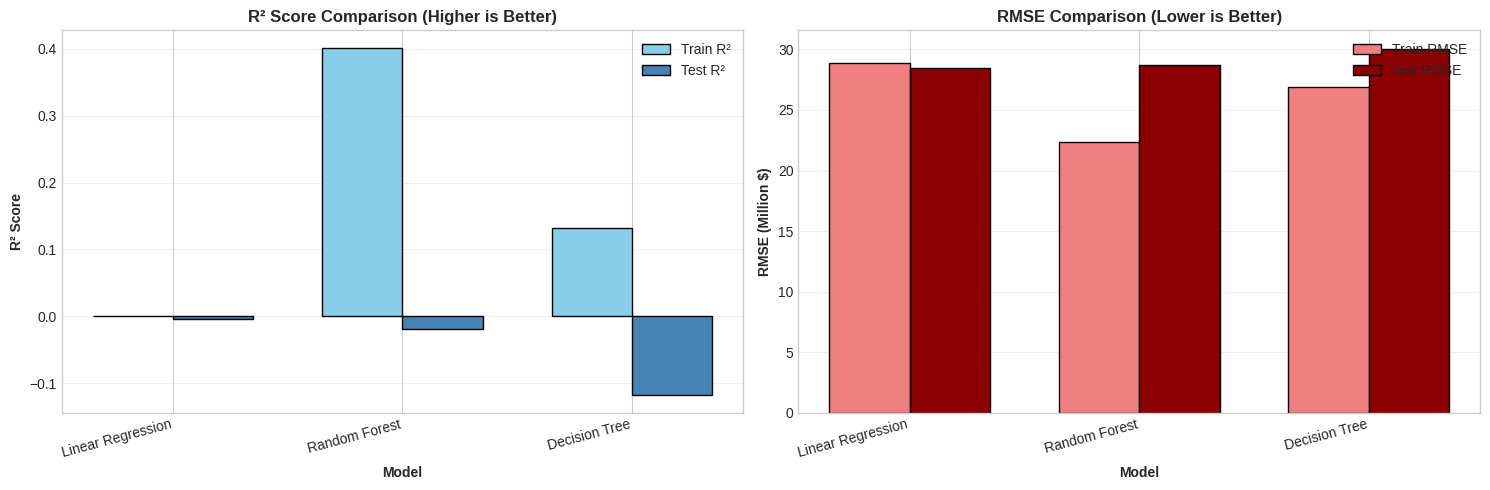

In [ ]:
# Loss Curve Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

models_list = list(results.keys())
train_losses_list = [results[m]['train_rmse'] for m in models_list]
test_losses_list = [results[m]['test_rmse'] for m in models_list]

x_pos = np.arange(len(models_list))
width = 0.35

# RMSE Loss Comparison
axes[0].bar(x_pos - width/2, train_losses_list, width, label='Train Loss (RMSE)', color='lightcoral', edgecolor='black')
axes[0].bar(x_pos + width/2, test_losses_list, width, label='Test Loss (RMSE)', color='darkred', edgecolor='black')
axes[0].set_xlabel('Model', fontweight='bold')
axes[0].set_ylabel('RMSE (Million $)', fontweight='bold')
axes[0].set_title('Loss Comparison - Train vs Test', fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(models_list, rotation=15, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# R² Score Comparison
train_r2_scores = [results[m]['train_r2'] for m in models_list]
test_r2_scores = [results[m]['test_r2'] for m in models_list]

axes[1].bar(x_pos - width/2, train_r2_scores, width, label='Train R²', color='skyblue', edgecolor='black')
axes[1].bar(x_pos + width/2, test_r2_scores, width, label='Test R²', color='steelblue', edgecolor='black')
axes[1].set_xlabel('Model', fontweight='bold')
axes[1].set_ylabel('R² Score', fontweight='bold')
axes[1].set_title('R² Score Comparison', fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models_list, rotation=15, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

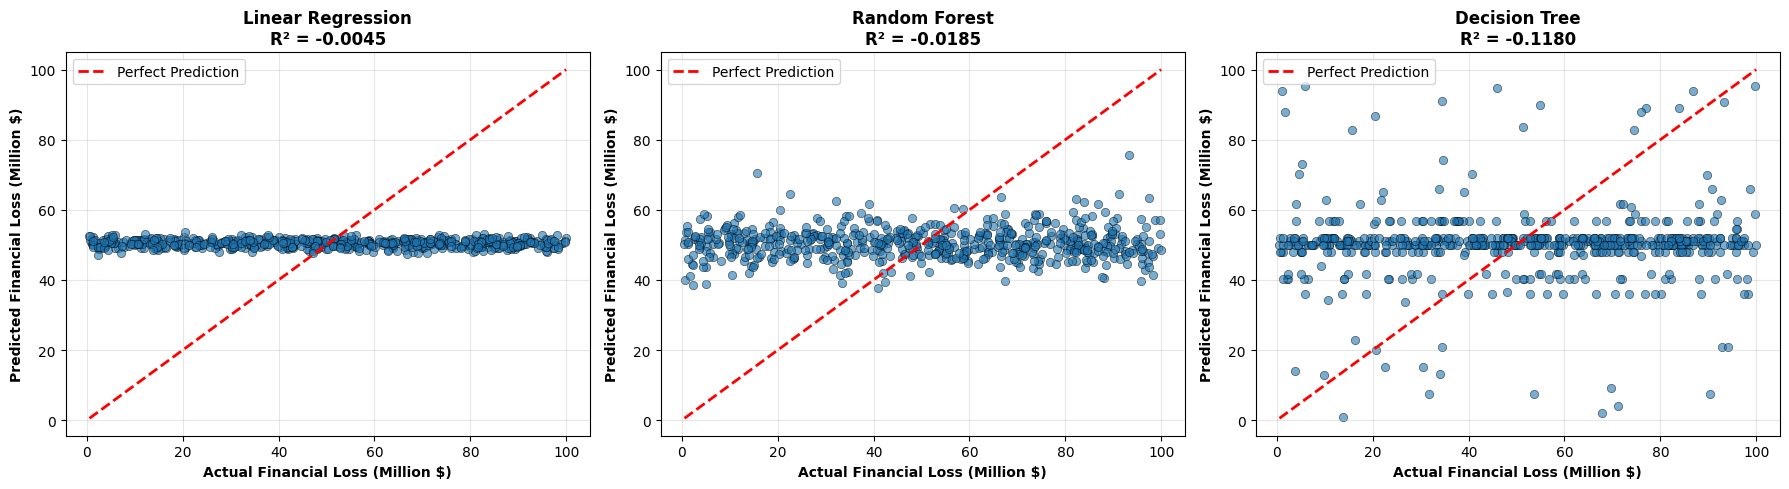

In [ ]:
# Scatter Plots - Before and After Predictions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Before - Raw data scatter plots
for idx, (model_name, result) in enumerate(results.items()):
    row = 0
    axes[row, idx].scatter(X_train.iloc[:, 0], y_train, alpha=0.3, label='Training Data')
    axes[row, idx].scatter(X_test.iloc[:, 0], y_test, alpha=0.3, label='Testing Data')
    axes[row, idx].set_xlabel(X.columns[0], fontweight='bold')
    axes[row, idx].set_ylabel('Actual Financial Loss ($M)', fontweight='bold')
    axes[row, idx].set_title(f'{model_name} - Before (Raw Data)', fontweight='bold')
    axes[row, idx].legend()
    axes[row, idx].grid(alpha=0.3)

# After - Actual vs Predicted
for idx, (model_name, result) in enumerate(results.items()):
    row = 1
    axes[row, idx].scatter(y_test, result['y_pred_test'], alpha=0.6, edgecolors='black', linewidth=0.5)
    axes[row, idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                       'r--', lw=2, label='Perfect Prediction Line')
    axes[row, idx].set_xlabel('Actual Financial Loss ($M)', fontweight='bold')
    axes[row, idx].set_ylabel('Predicted Financial Loss ($M)', fontweight='bold')
    axes[row, idx].set_title(f'{model_name} - After\nR² = {result["test_r2"]:.4f}', fontweight='bold')
    axes[row, idx].legend()
    axes[row, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

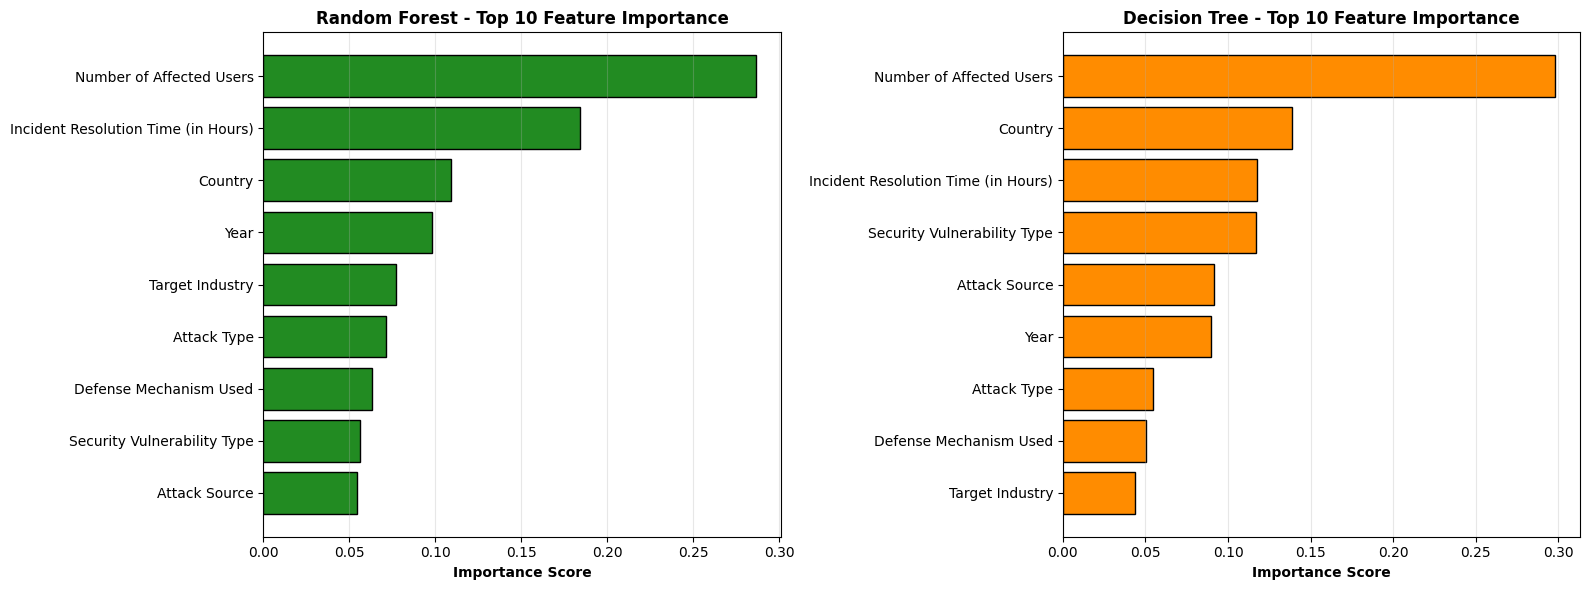


📊 Top 5 Most Important Features (Random Forest):
                               Feature  Importance
4             Number of Affected Users    0.286485
8  Incident Resolution Time (in Hours)    0.183958
0                              Country    0.109132
1                                 Year    0.098168
3                      Target Industry    0.077119


In [ ]:
# Feature Importance Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': results['Random Forest']['model'].feature_importances_
}).sort_values('Importance', ascending=False)

axes[0].barh(rf_importance['Feature'][:10], rf_importance['Importance'][:10], 
             color='forestgreen', edgecolor='black')
axes[0].set_xlabel('Importance Score', fontweight='bold')
axes[0].set_title('Random Forest - Top 10 Feature Importance', fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': results['Decision Tree']['model'].feature_importances_
}).sort_values('Importance', ascending=False)

axes[1].barh(dt_importance['Feature'][:10], dt_importance['Importance'][:10], 
             color='darkorange', edgecolor='black')
axes[1].set_xlabel('Importance Score', fontweight='bold')
axes[1].set_title('Decision Tree - Top 10 Feature Importance', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features (Random Forest):")
print(rf_importance.head())

## Save Best Model and Create Prediction Script

In [26]:
# Save the best performing model
best_model = results[best_model_name]['model']

joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print(f"Best model saved: {best_model_name}")
print(f"Model file: best_model.pkl")
print(f"Scaler file: scaler.pkl")
print(f"Label encoders file: label_encoders.pkl")

print("\n" + "=" * 70)
print("FINAL SUMMARY - CYBERSECURITY THREATS REGRESSION ANALYSIS")
print("=" * 70)

print(f"\nDataset: {df.shape[0]:,} records, {df.shape[1]} features")
print(f"Target Variable: Financial Loss (in Million $)")
print(f"Time Period: {df['Year'].min()} - {df['Year'].max()}")

print(f"\nModels Evaluated:")
for idx, model_name in enumerate(results.keys(), 1):
    print(f"  {idx}. {model_name}")

print(f"\nBest Performing Model: {best_model_name}")
print(f"  Test R² Score: {comparison_df['Test R²'].max():.4f}")
print(f"  Test RMSE: ${comparison_df.loc[comparison_df['Model'] == best_model_name, 'Test RMSE'].values[0]:.2f}M")
print(f"  Test MAE: ${comparison_df.loc[comparison_df['Model'] == best_model_name, 'Test MAE'].values[0]:.2f}M")

print("\n" + "=" * 70)

Best model saved: Linear Regression
Model file: best_model.pkl
Scaler file: scaler.pkl
Label encoders file: label_encoders.pkl

FINAL SUMMARY - CYBERSECURITY THREATS REGRESSION ANALYSIS

Dataset: 3,000 records, 10 features
Target Variable: Financial Loss (in Million $)
Time Period: 2015 - 2024

Models Evaluated:
  1. Linear Regression
  2. Random Forest
  3. Decision Tree

Best Performing Model: Linear Regression
  Test R² Score: -0.0045
  Test RMSE: $28.50M
  Test MAE: $24.66M



## Prediction Function for Task 2

In [27]:
def predict_financial_loss(country, year, attack_type, target_industry, 
                          num_affected_users, attack_source, vulnerability_type, 
                          defense_mechanism, resolution_time):
    """
    Predict financial loss for a cybersecurity incident
    
    Parameters:
    -----------
    country : str - Country where attack occurred
    year : int - Year of attack
    attack_type : str - Type of cyber attack
    target_industry : str - Industry targeted
    num_affected_users : int - Number of users affected
    attack_source : str - Source of attack
    vulnerability_type : str - Type of security vulnerability
    defense_mechanism : str - Defense mechanism used
    resolution_time : int - Time to resolve incident (hours)
    
    Returns:
    --------
    float - Predicted financial loss in million dollars
    """
    
    # Load saved model and preprocessing objects
    model = joblib.load('best_model.pkl')
    scaler = joblib.load('scaler.pkl')
    encoders = joblib.load('label_encoders.pkl')
    
    # Create input dataframe
    input_data = pd.DataFrame({
        'Country': [country],
        'Year': [year],
        'Attack Type': [attack_type],
        'Target Industry': [target_industry],
        'Number of Affected Users': [num_affected_users],
        'Attack Source': [attack_source],
        'Security Vulnerability Type': [vulnerability_type],
        'Defense Mechanism Used': [defense_mechanism],
        'Incident Resolution Time (in Hours)': [resolution_time]
    })
    
    # Encode categorical variables
    for col in encoders.keys():
        if col in input_data.columns:
            input_data[col] = encoders[col].transform(input_data[col])
    
    # Standardize features
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_scaled)[0]
    
    return prediction

# Example usage
example_prediction = predict_financial_loss(
    country='USA',
    year=2024,
    attack_type='Ransomware',
    target_industry='Healthcare',
    num_affected_users=500000,
    attack_source='Hacker Group',
    vulnerability_type='Unpatched Software',
    defense_mechanism='Firewall',
    resolution_time=48
)

print(f"Example Prediction:")
print(f"Predicted Financial Loss: ${example_prediction:.2f} Million")

Example Prediction:
Predicted Financial Loss: $49.94 Million


In [29]:
# Check available values for categorical variables
print("Available values for categorical features:")
print("\nTarget Industries:", df['Target Industry'].unique().tolist())
print("\nAttack Types:", df['Attack Type'].unique().tolist())
print("\nCountries:", df['Country'].unique().tolist())
print("\nAttack Sources:", df['Attack Source'].unique().tolist())
print("\nVulnerability Types:", df['Security Vulnerability Type'].unique().tolist())
print("\nDefense Mechanisms:", df['Defense Mechanism Used'].unique().tolist())

Available values for categorical features:

Target Industries: ['Education', 'Retail', 'IT', 'Telecommunications', 'Government', 'Banking', 'Healthcare']

Attack Types: ['Phishing', 'Ransomware', 'Man-in-the-Middle', 'DDoS', 'SQL Injection', 'Malware']

Countries: ['China', 'India', 'UK', 'Germany', 'France', 'Australia', 'Russia', 'Brazil', 'Japan', 'USA']

Attack Sources: ['Hacker Group', 'Nation-state', 'Insider', 'Unknown']

Vulnerability Types: ['Unpatched Software', 'Weak Passwords', 'Social Engineering', 'Zero-day']

Defense Mechanisms: ['VPN', 'Firewall', 'AI-based Detection', 'Antivirus', 'Encryption']
